# Convolutional Neural Network
#### Aquí importamos librerías, el script necesario (return_pixel_df) y ponemos algunos datos de set u

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import return_pixel_df
import logging as log
from IPython.display import display
import return_data

num_img = 2000
# size    = 9248       # 220 -> 2^2 · 5 · 11
# size1, size2 = 68, 136
size, size1, size2 = 2000, 20, 100
parity_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Parity.mat'   # L -> Pseudo random
random_matrix_path = 'Matlab/matrix_generated/Mat_LCP_Urand2.mat'   # R -> True random
data               = 'Mat_coef_recortada'

## Read Data
#### El DataFrame tendrá tantas features como píxeles tengan las fotos

In [2]:
import mat73
import scipy.io

#--------------------------------------------------------------------------------------------#
#                                             Read Data                                      #
#--------------------------------------------------------------------------------------------#

parity = mat73.loadmat(parity_matrix_path)
parity = parity[data].astype(np.float)

random = mat73.loadmat(random_matrix_path)
random = random[data].astype(np.float)


parity = parity.flatten()
random = random.flatten()

#--------------------------------------------------------------------------------------------#
#                                             DataFrame                                      #
#--------------------------------------------------------------------------------------------#

X = []
y = []

i = 0
for j in range(num_img):
    row = []
    for k in range(size):
        row.append(parity[i])
        i += 1
    X.append(row)
    y.append('0')       # Parity label

i = 0
for j in range(num_img):
    row = []
    for k in range(size):
        row.append(random[i])
        i += 1
    X.append(row)
    y.append('1')       # Urand2 label

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)
display  (df_pixel)

,Label,0,1,2,3,4,5,6,7,8,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3996,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3997,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3998,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Plot Data

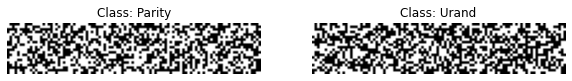

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
label = ['Parity', 'Urand']
img_ = [np.reshape(X[0], (size1, size2)).T, np.reshape(X[num_img], (size1, size2)).T]
for i in range (len(label)):
    plt.subplot(1, 2, i+1)
    # img = df_pixel[df_pixel['Label']==i].iloc[0,1:].values
    img = img_[i]
    img = img.reshape((size1, size2))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + label[i])
    plt.axis('off')
    
plt.show()

## Reshape

Nuestras imágenes son de size x size pero para usar Keras tienen que ser matrices 3D. Es por eso que les cambiamos la forma a size x size x 1, usaremos 1 canal puesto que son fotos en blanco y negro.

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical     # Label Encoding

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']
y = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1, size1, size2, 1)
X_test  = X_test.values.reshape (-1, size1, size2, 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (2800, 20, 100, 1)
X_test shape (1200, 20, 100, 1)
y_train shape (2800, 2)
y_test shape (1200, 2)


# Implementación de la red neuronal convolucional

#### Optimizador

In [5]:
from keras.optimizers import RMSprop, Adam

optimizer = Adam(learning_rate=0.001, 
                 beta_1=0.9, 
                 beta_2=0.999, 
                 epsilon=None, 
                 decay=0.0, 
                 amsgrad=False)

In [6]:
#-------------------------------------------------------------------------------------------#
#                                             Framework                                     #
#-------------------------------------------------------------------------------------------#

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D

#-------------------------------------------------------------------------------------------#
#                                               Model                                       #
#-------------------------------------------------------------------------------------------#

model = Sequential()    # Linear Layering

model.add(Conv2D(16, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))         # 32 filtros convolucionales 3x3
model.add(MaxPooling2D(pool_size = (2, 2)))                                                 # tensor is down-sampled by half. Agrupacion

# model.add(Conv2D(32, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(16, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Dropout(0.25))

model.add(Flatten())                                                                        # flatten, projecting to lower dimensions
model.add(Dense(units = 64, activation = 'relu'))                                           # input layer with 128 inputs to prevent overfitting
model.add(Dense(units = 2, activation = 'sigmoid'))                                         # activation layer. softmax para recibir probabilidades

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])  # compiling
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 98, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 49, 16)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7056)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                451648    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 451,938
Trainable params: 451,938
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs      = 20
batchSize   = 100

cnn  = model.fit(x= X_train, y= y_train, validation_data=(X_test, y_test), steps_per_epoch = 50, 
                                                        epochs = epochs, validation_steps=10, 
                                                        batch_size=batchSize)

Epoch 1/20
50/50 [==============================] - 4s 74ms/step - loss: 0.3575 - accuracy: 0.9384 - val_loss: 0.6940 - val_accuracy: 0.6290
Epoch 2/20
50/50 [==============================] - 3s 65ms/step - loss: 0.3202 - accuracy: 0.9572 - val_loss: 0.6920 - val_accuracy: 0.6390
Epoch 3/20
50/50 [==============================] - 3s 58ms/step - loss: 0.3075 - accuracy: 0.9618 - val_loss: 0.7419 - val_accuracy: 0.6390
Epoch 4/20
50/50 [==============================] - 3s 52ms/step - loss: 0.2747 - accuracy: 0.9792 - val_loss: 0.7577 - val_accuracy: 0.6350
Epoch 5/20
50/50 [==============================] - 3s 52ms/step - loss: 0.2518 - accuracy: 0.9892 - val_loss: 0.8311 - val_accuracy: 0.6340
Epoch 6/20
50/50 [==============================] - 3s 51ms/step - loss: 0.2349 - accuracy: 0.9922 - val_loss: 0.8406 - val_accuracy: 0.6390
Epoch 7/20
50/50 [==============================] - 3s 51ms/step - loss: 0.2200 - accuracy: 0.9936 - val_loss: 0.8952 - val_accuracy: 0.6460
Epoch 8/20
50

# Evaluación del modelo

In [13]:
print("Accuracy after fitting: {:.2f}%".format(cnn.history['accuracy'][-1]*100))

Accuracy after fitting: 99.10%


#### Para una mayor precisión, puede aumentar el número de épocas o puede cambiar los parámetros en las capas o puede agregar una capa adicional al modelo.

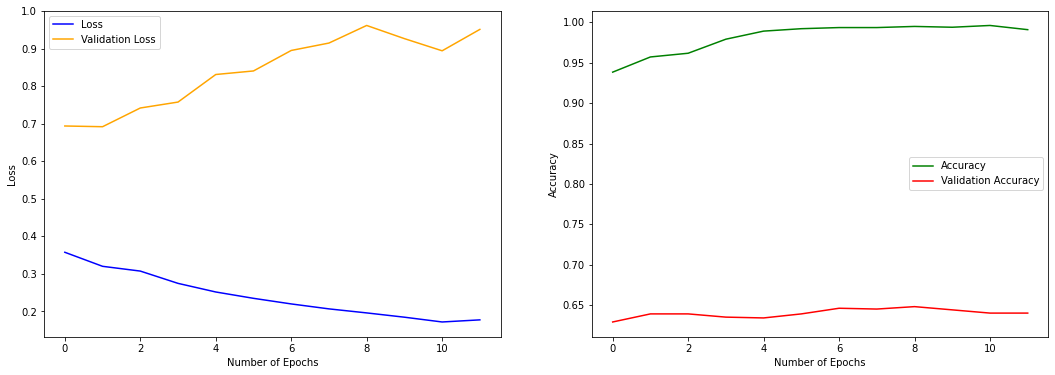

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(cnn.history['loss'], color="blue", label = "Loss")
plt.plot(cnn.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn.history['accuracy'], color="green", label = "Accuracy")
plt.plot(cnn.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [15]:
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1]*100))

38/38 [==============================] - 0s 7ms/step - loss: 0.9733 - accuracy: 0.6417
Test Loss: 0.9733
Test Accuracy: 64.17%


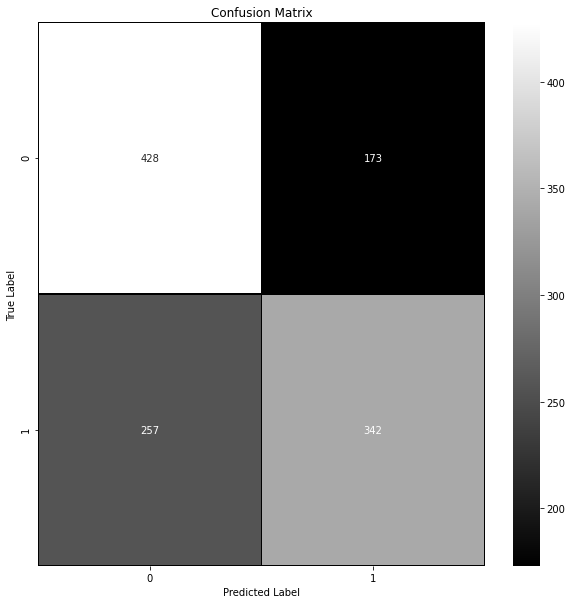

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()